<a href="https://colab.research.google.com/github/Akshay-Khetre/Data_Visualisation/blob/main/Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

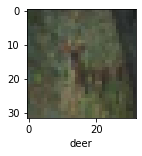

In [10]:
plot_sample(X_train, y_train, 10)

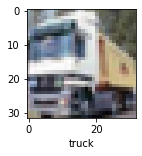

In [11]:

plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.8154 - accuracy: 0.3539
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6241 - accuracy: 0.4267
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5402 - accuracy: 0.4576
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4816 - accuracy: 0.4804
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4332 - accuracy: 0.4948
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3885 - accuracy: 0.5123
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3514 - accuracy: 0.5238
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3146 - accuracy: 0.5386
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2834 - accuracy: 0.5487
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.25

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.45      0.54      1000
           1       0.74      0.51      0.60      1000
           2       0.31      0.61      0.41      1000
           3       0.36      0.40      0.38      1000
           4       0.60      0.20      0.30      1000
           5       0.53      0.27      0.36      1000
           6       0.52      0.65      0.58      1000
           7       0.51      0.68      0.58      1000
           8       0.59      0.72      0.65      1000
           9       0.59      0.56      0.58      1000

    accuracy                           0.50     10000
   macro avg       0.54      0.50      0.50     10000
weighted avg       0.54      0.50      0.50     10000



In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 13s 4ms/step - loss: 1.4901 - accuracy: 0.4610
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1608 - accuracy: 0.5936
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0375 - accuracy: 0.6383
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9549 - accuracy: 0.6689
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8924 - accuracy: 0.6907
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8446 - accuracy: 0.7067
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7947 - accuracy: 0.7258
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7569 - accuracy: 0.7356
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7206 - accuracy: 0.7508
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.68

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1243 - accuracy: 0.6877


[1.124265193939209, 0.6876999735832214]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.1219899e-04, 5.6369409e-08, 8.0200343e-06, 9.5975947e-01,
        3.1033858e-05, 3.1736866e-02, 6.5625162e-04, 7.7930309e-07,
        7.6947003e-03, 6.7989140e-07],
       [7.5576156e-02, 3.0861694e-01, 3.8848474e-04, 7.2837342e-06,
        6.5779147e-08, 2.1722794e-08, 3.1762596e-07, 1.0366005e-07,
        6.0643667e-01, 8.9739356e-03],
       [4.0005147e-01, 5.0733286e-01, 9.5456099e-04, 3.9303591e-03,
        4.8255574e-04, 1.6810963e-04, 1.0140817e-04, 2.8248825e-03,
        2.4276018e-02, 5.9877794e-02],
       [7.1569484e-01, 7.8627310e-04, 5.8707513e-04, 8.8439148e-05,
        3.7357855e-05, 6.8785724e-08, 1.2442604e-05, 4.6607820e-06,
        2.8274781e-01, 4.0963972e-05],
       [1.9107022e-06, 1.4377144e-06, 8.3782896e-03, 3.9680205e-02,
        1.9656852e-01, 3.5894482e-04, 7.5500923e-01, 1.3343120e-07,
        1.3613435e-06, 3.6701506e-09]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

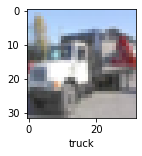

In [22]:
plot_sample(X_test, y_test,45)

In [23]:
classes[y_classes[45]]

'truck'

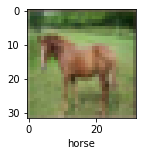

In [24]:
plot_sample(X_test, y_test,48)

In [25]:
classes[y_classes[48]]

'horse'

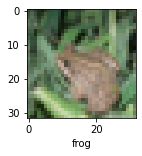

In [26]:
plot_sample(X_test, y_test,4)

In [27]:
classes[y_classes[100]]

'deer'

In [28]:
classes[y_classes[4]]

'frog'

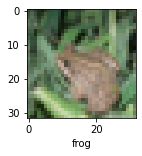

In [29]:
plot_sample(X_test, y_test,4)

In [30]:
classes[y_classes[4]]

'frog'

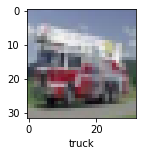

In [31]:
plot_sample(X_test, y_test, 89)

In [32]:
classes[y_classes[79]]

'ship'

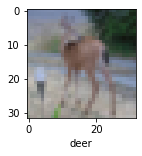

In [37]:
plot_sample(X_test, y_test, 100)

In [38]:
classes[y_classes[100]]

'deer'